<a href="https://colab.research.google.com/github/SiddharthTiwarids23/project-1/blob/main/Prediction_of_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Problem

RealAgents is a real
fictitious estate company that focuses on selling houses.

RealAgents sells a variety of types of house in one metropolitan area.

Some houses sell slowly and sometimes require lowering the price in order to find a buyer.

In order to stay competitive, RealAgents would like to optimize the listing prices of the houses it is trying to sell.

They want to do this by predicting the sale price of a house given its characteristics.

If they can predict the sale price in advance, they can decrease the time to sale.


# Task 1

The team at RealAgents knows that the city that a property is located in makes a difference to the sale price.

Unfortuntately they believe that this isn't always recorded in the data.

Calculate the number of missing values of the `city`.



 - Your output should be an object `missing_city`, that contains the number of missing values in this column.

# Loading and Quick Look at the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

warnings.filterwarnings("ignore")

In [ ]:
!wget -O house_sales.csv https://raw.githubusercontent.com/SiddharthTiwarids23/project-1/main/house_sales.csv
!wget -O train.csv https://raw.githubusercontent.com/SiddharthTiwarids23/project-1/main/train.csv
!wget -O validation.csv https://raw.githubusercontent.com/SiddharthTiwarids23/project-1/main/validation.csv

--2024-01-10 15:43:00--  https://raw.githubusercontent.com/SiddharthTiwarids23/project-1/main/house_sales.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94372 (92K) [text/plain]
Saving to: ‘house_sales.csv’

house_sales.csv     100%[===================>]  92.16K  --.-KB/s    in 0.01s   

2024-01-10 15:43:00 (6.35 MB/s) - ‘house_sales.csv’ saved [94372/94372]

--2024-01-10 15:43:00--  https://raw.githubusercontent.com/SiddharthTiwarids23/project-1/main/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68904 (67K) [text

In [ ]:
house_sale = pd.read_csv("house_sales.csv")
house_sale.head()

,house_id,city,sale_price,sale_date,months_listed,bedrooms,house_type,area
0,1217792,Silvertown,55943,2021-09-12,5.4,2,Semi-detached,107.8 sq.m.
1,1900913,Silvertown,384677,2021-01-17,6.3,5,Detached,498.8 sq.m.
2,1174927,Riverford,281707,2021-11-10,6.9,6,Detached,542.5 sq.m.
3,1773666,Silvertown,373251,2020-04-13,6.1,6,Det.,528.4 sq.m.
4,1258487,Silvertown,328885,2020-09-24,8.7,5,Detached,477.1 sq.m.


In [ ]:
house_sale.describe()

,house_id,sale_price,months_listed,bedrooms
count,1.500000e+03,1500.000000,1469.000000,1500.000000
mean,1.501071e+06,228121.500000,5.901498,4.018000
std,2.835584e+05,117908.147306,1.954070,1.413391
min,1.000296e+06,26348.000000,0.500000,2.000000
25%,1.258978e+06,127470.750000,4.500000,3.000000
50%,1.509208e+06,230058.500000,5.900000,4.000000
75%,1.734578e+06,316793.500000,7.200000,5.000000
max,1.999721e+06,509536.000000,12.300000,6.000000


In [ ]:
house_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   house_id       1500 non-null   int64  
 1   city           1500 non-null   object 
 2   sale_price     1500 non-null   int64  
 3   sale_date      1500 non-null   object 
 4   months_listed  1469 non-null   float64
 5   bedrooms       1500 non-null   int64  
 6   house_type     1500 non-null   object 
 7   area           1500 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB




## Data

The dataset contains records of previous houses sold in the area.

| Column Name | Criteria                                                |
|-------------|---------------------------------------------------------|
| house_id    | Nominal. </br> Unique identifier for houses.  |
| city        | Nominal. </br>The city in which the house is located. One of 'Silvertown', 'Riverford', 'Teasdale' and 'Poppleton'.
| sale_price  | Discrete. </br>The sale price of the house in whole dollars. Values can be any positive number greater than or equal to zero.
| sale_date   | Discrete. </br>The date of the last sale of the house.
| months_listed  | Continuous. </br>The number of months the house was listed on the market prior to its last sale, rounded to one decimal place.
| bedrooms    | Discrete. </br>The number of bedrooms in the house. Any positive values greater than or equal to zero.
| house_type   | Ordinal. </br>One of "Terraced" (two shared walls), "Semi-detached" (one shared wall), or "Detached" (no shared walls).
| area      | Continuous. </br>The area of the house in square meters, rounded to one decimal place.

In [ ]:
house_sale.isnull().sum()

house_id          0
city              0
sale_price        0
sale_date         0
months_listed    31
bedrooms          0
house_type        0
area              0
dtype: int64

In [ ]:

house_sale['city'].isna().sum()


0

In [ ]:
house_sale['city']. unique()

array(['Silvertown', 'Riverford', 'Teasdale', 'Poppleton', '--'],
      dtype=object)

In [ ]:
# calculating missing values in city column
missing_city = (house_sale['city'] == '--').sum()

In [ ]:
# total missing values in the city column
missing_city

73

There were 73 instances where the name of the city was missing

# Task 2

Before you fit any models, you will need to make sure the data is clean.

The table below shows what the data should look like.

Create a cleaned version of the dataframe.



- Your output should be a dataframe named `clean_data`.



# Cleaning and Pre-processing

In [ ]:
# checking for any missing values
house_sale.isnull().sum()

house_id          0
city              0
sale_price        0
sale_date         0
months_listed    31
bedrooms          0
house_type        0
area              0
dtype: int64

In [ ]:
# Cleaning the 'area' column by removing "sq.m." and converting it to a numeric data type
house_sale['area'] = house_sale['area'].str.replace(' sq.m.', '').astype(float)

In [ ]:
house_sale['city']. unique()

array(['Silvertown', 'Riverford', 'Teasdale', 'Poppleton', '--'],
      dtype=object)

In [ ]:
house_sale['house_type']. unique()

array(['Semi-detached', 'Detached', 'Det.', 'Terraced', 'Semi', 'Terr.'],
      dtype=object)

In [ ]:
# Replacing the missing values in the 'city' column with 'unknown'
house_sale['city'] = house_sale['city'].replace({'--': 'Unknown'})

In [ ]:
house_sale['city']. unique()

array(['Silvertown', 'Riverford', 'Teasdale', 'Poppleton', 'Unknown'],
      dtype=object)

In [ ]:
# Standardizing the 'house_type' column
house_sale['house_type'] = house_sale['house_type'].replace({'Det.': 'Detached'})

house_sale['house_type'] = house_sale['house_type'].replace({'Semi': 'Semi-detached', 'Terr.': 'Terraced'})

# Converting 'sale_date' to a datetime data type
house_sale['sale_date'] = pd.to_datetime(house_sale['sale_date'])


house_sale.head()

,house_id,city,sale_price,sale_date,months_listed,bedrooms,house_type,area
0,1217792,Silvertown,55943,2021-09-12,5.4,2,Semi-detached,107.8
1,1900913,Silvertown,384677,2021-01-17,6.3,5,Detached,498.8
2,1174927,Riverford,281707,2021-11-10,6.9,6,Detached,542.5
3,1773666,Silvertown,373251,2020-04-13,6.1,6,Detached,528.4
4,1258487,Silvertown,328885,2020-09-24,8.7,5,Detached,477.1


In [ ]:
# Replace missing values in 'months_listed' with the mean, rounded to one decimal place
mean_months_listed = house_sale['months_listed'].mean()
house_sale['months_listed'].fillna(round(mean_months_listed, 1), inplace=True)
clean_data = house_sale

clean_data.head()

,house_id,city,sale_price,sale_date,months_listed,bedrooms,house_type,area
0,1217792,Silvertown,55943,2021-09-12,5.4,2,Semi-detached,107.8
1,1900913,Silvertown,384677,2021-01-17,6.3,5,Detached,498.8
2,1174927,Riverford,281707,2021-11-10,6.9,6,Detached,542.5
3,1773666,Silvertown,373251,2020-04-13,6.1,6,Detached,528.4
4,1258487,Silvertown,328885,2020-09-24,8.7,5,Detached,477.1


In [ ]:
# checking for any remaining missing values
clean_data.isnull().sum()

house_id         0
city             0
sale_price       0
sale_date        0
months_listed    0
bedrooms         0
house_type       0
area             0
dtype: int64

- There were 31 missing values in months_listed column , which were replaced with the mean.
- area column in the dataset is formatted as a string with the suffix "sq.m.", which is preventing proper numerical operations. To address this, we  cleaned the area column by removing the "sq.m." suffix and converting it to a numeric data type.
- In the house_type column, any abbreviated or inconsistent representations (like "Det.") have been standardized to the correct format (e.g., "Detached").
- The sale_date column has been converted to a datetime data type for more appropriate handling of date information.


# Task 3

The team at RealAgents have told you that they have always believed that the number of bedrooms is the biggest driver of house price.

Producing a table showing the difference in the average sale price by number of bedrooms along with the variance to investigate this question for the team.



 - Your output should be a data frame named `price_by_rooms`.



# EDA

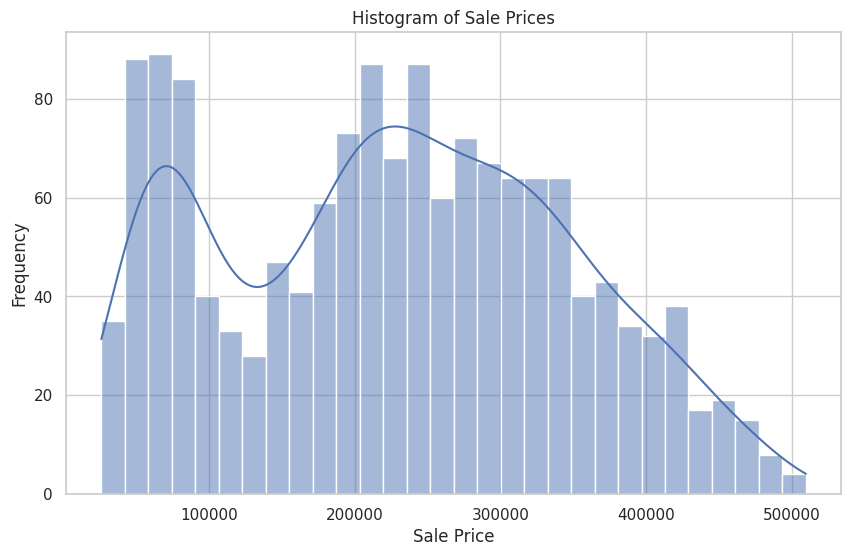

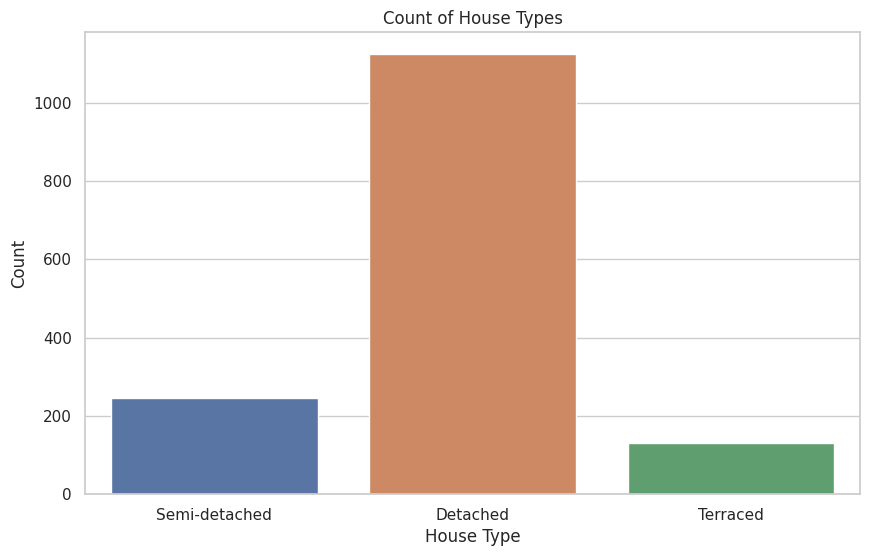

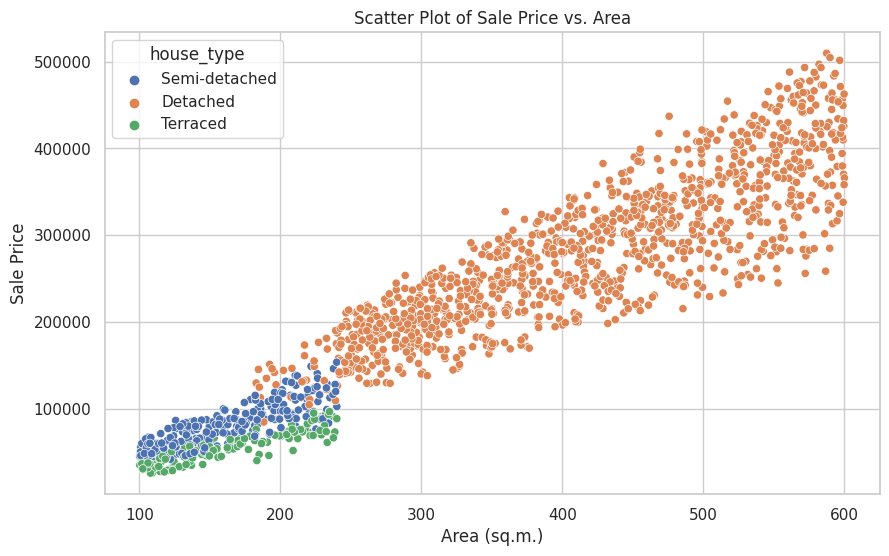

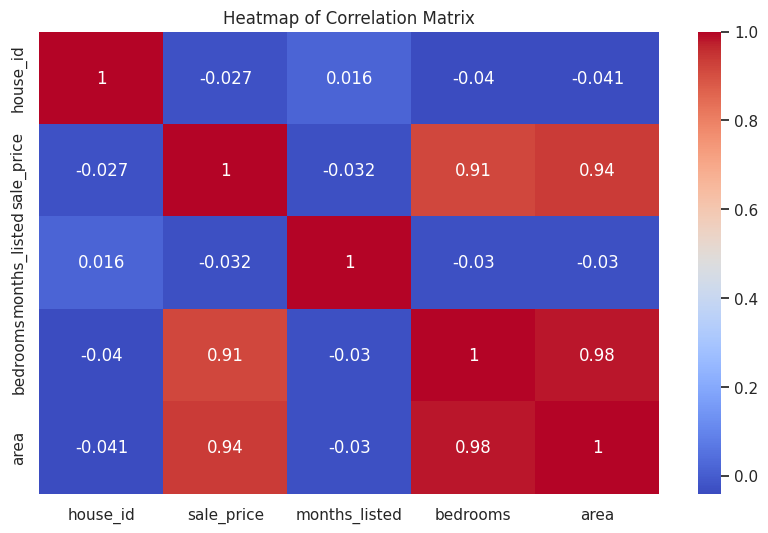

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Single Variable Visualization: Histogram of Sale Prices
plt.figure(figsize=(10, 6))
sns.histplot(clean_data['sale_price'], kde=True, bins=30)
plt.title('Histogram of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

# Single Variable Visualization: Bar Chart of House Types
plt.figure(figsize=(10, 6))
sns.countplot(x='house_type', data=clean_data)
plt.title('Count of House Types')
plt.xlabel('House Type')
plt.ylabel('Count')
plt.show()

# Multi-Variable Visualization: Scatter Plot of Sale Price vs. Area
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='sale_price', data=clean_data, hue='house_type')
plt.title('Scatter Plot of Sale Price vs. Area')
plt.xlabel('Area (sq.m.)')
plt.ylabel('Sale Price')
plt.show()

# Multi-Variable Visualization: Heatmap of Correlation Matrix
plt.figure(figsize=(10, 6))
corr = clean_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()


- The histogram indicates a specific range where most house prices fall, suggesting a concentration of market activity in that price bracket. The presence of outliers at higher price ranges indicates that while most houses are within a moderate price range, there are a few significantly higher-priced properties.
- The bar chart reveals the frequency of each house type sold. It shows which types of houses are more prevalent in the dataset, indicating their popularity or availability in the market.
- The scatter plot shows a trend where larger houses (in terms of area) generally have higher sale prices. However, the spread of data points indicates variability in price even among houses with similar areas.
- The heatmap of the correlation matrix highlights the strength of relationships between different numerical variables. It shows how variables like area, number of bedrooms, and months listed are correlated with the sale price.

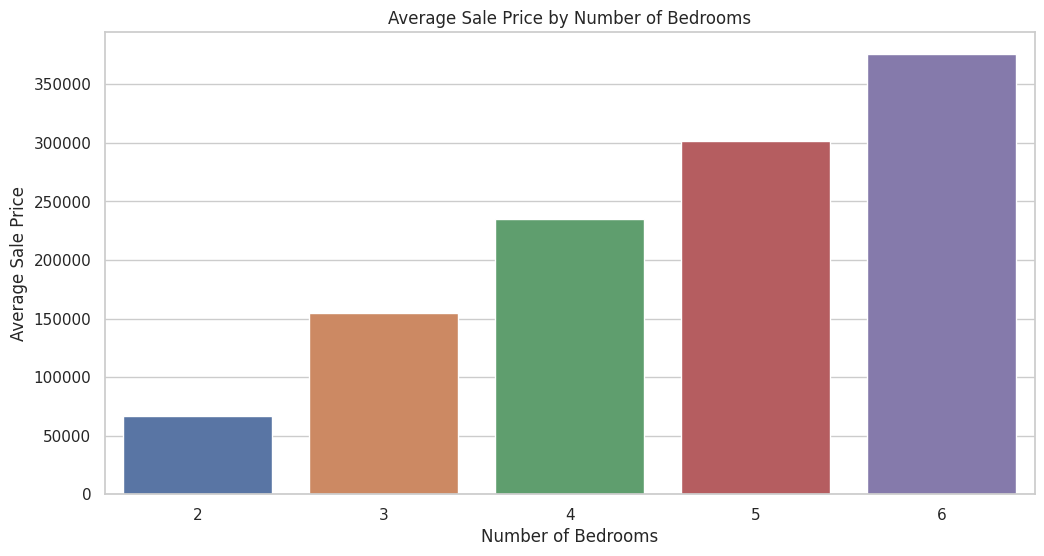

In [ ]:
# Creating a Bar Chart of Average Sale Price by Number of Bedrooms
avg_price_by_bedrooms = clean_data.groupby('bedrooms')['sale_price'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='bedrooms', y='sale_price', data=avg_price_by_bedrooms)
plt.title('Average Sale Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Sale Price')
plt.show()

The bar chart shows the average sale price for each number of bedrooms. This visualization makes it clear whether there is a increasing trend in sale prices increasing with the number of bedrooms.

In [ ]:
# Numeric Aggregation: Average sale price and total area by city
numeric_aggregation = clean_data.groupby('city').agg({'sale_price': 'mean', 'area': 'sum'}).round(1)

# Categorical Aggregation: Count of house types in each city
categorical_aggregation = clean_data.groupby(['city', 'house_type']).size().reset_index(name='count')

# Date Aggregation: Earliest and latest sale dates in each city
date_aggregation = clean_data.groupby('city').agg({'sale_date': ['min', 'max']})

# Displaying the results
numeric_aggregation, categorical_aggregation, date_aggregation

(            sale_price      area
 city                            
 Poppleton     196457.9  123568.3
 Riverford     171821.4   65274.1
 Silvertown    240199.0  184326.4
 Teasdale      274862.3  131282.8
 Unknown       205623.4   23734.3,
           city     house_type  count
 0    Poppleton       Detached    266
 1    Poppleton  Semi-detached     67
 2    Poppleton       Terraced     29
 3    Riverford       Detached    134
 4    Riverford  Semi-detached     31
 5    Riverford       Terraced     17
 6   Silvertown       Detached    397
 7   Silvertown  Semi-detached     78
 8   Silvertown       Terraced     42
 9     Teasdale       Detached    281
 10    Teasdale  Semi-detached     49
 11    Teasdale       Terraced     36
 12     Unknown       Detached     46
 13     Unknown  Semi-detached     20
 14     Unknown       Terraced      7,
             sale_date           
                   min        max
 city                            
 Poppleton  2020-01-05 2022-12-30
 Riverford  2020

In [ ]:
# Calculating the average sale price and variance of sale price by number of bedrooms
price_by_rooms = clean_data.groupby('bedrooms')['sale_price'].agg(['mean', 'var'])
price_by_rooms.columns = ['avg_price', 'var_price']

# Rounding the results to 1 decimal place
price_by_rooms = price_by_rooms.round(1)

# Resetting index to include 'bedrooms' as a column
price_by_rooms.reset_index(inplace=True)

price_by_rooms.head()

,bedrooms,avg_price,var_price
0,2,67076.4,5.652896e+08
1,3,154665.1,2.378289e+09
2,4,234704.6,1.725211e+09
3,5,301515.9,2.484328e+09
4,6,375741.3,3.924432e+09


# Task 4

Fit a baseline model to predict the sale price of a house.


# Modeling and Evaluation


 As the desired outcome is price (continious) this will be considered as a regression problem.

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the datasets
train = pd.read_csv('train.csv')
validation = pd.read_csv('validation.csv')

In [ ]:
# Preprocessing the training data
X_train = train.drop('sale_price', axis=1)
y_train = train['sale_price']
X_train['sale_year'] = pd.to_datetime(X_train['sale_date']).dt.year
X_train['sale_month'] = pd.to_datetime(X_train['sale_date']).dt.month
X_train.drop('sale_date', axis=1, inplace=True)

# Preprocessing the validation data
X_validation = validation.copy()
X_validation['sale_year'] = pd.to_datetime(X_validation['sale_date']).dt.year
X_validation['sale_month'] = pd.to_datetime(X_validation['sale_date']).dt.month
X_validation.drop('sale_date', axis=1, inplace=True)

# Identifying common columns in both training and validation sets, excluding 'house_id'
common_columns = [col for col in X_train.columns if col in X_validation.columns]

# Encoding categorical variables
categorical_features = ['city', 'house_type']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

# Creating a pipeline with transformation and linear regression model
model = Pipeline(steps=[("transformer", transformer), ("model", LinearRegression())])

# Fitting the model to the training data using only the common columns
model.fit(X_train[common_columns], y_train)

# Predicting prices on the validation set using the same common columns
predicted_prices = model.predict(X_validation[common_columns])

# Creating the base_result dataframe with 'house_id' and predicted 'price'
base_result = pd.DataFrame({
    'house_id': validation['house_id'],
    'price': predicted_prices
})

# Display the first few rows of the result
base_result.head()


,house_id,price
0,1331375,121583.794621
1,1630115,303660.601417
2,1645745,384960.340264
3,1336775,125539.764586
4,1888274,270845.711871


# Task 5

Fit a comparison model to predict the sale price of a house.



In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressor model
decision_tree_model = Pipeline(steps=[("transformer", transformer), ("model", DecisionTreeRegressor())])

# Fitting the decision tree model to the training data
decision_tree_model.fit(X_train[common_columns], y_train)

# Predicting prices on the validation set
predicted_prices_dt = decision_tree_model.predict(X_validation[common_columns])

# Creating the compare_result dataframe with 'house_id' and predicted 'price'
compare_result = pd.DataFrame({
    'house_id': validation['house_id'],
    'price': predicted_prices_dt
})

compare_result.head()


,house_id,price
0,1331375,73959.0
1,1630115,311847.0
2,1645745,413320.0
3,1336775,103346.0
4,1888274,260472.0


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor model
random_forest_model = Pipeline(steps=[("transformer", transformer), ("model", RandomForestRegressor())])

# Fitting the random forest model to the training data
random_forest_model.fit(X_train[common_columns], y_train)

# Predicting prices on the validation set
predicted_prices_rf = random_forest_model.predict(X_validation[common_columns])

# Creating the compare_result dataframe with 'house_id' and predicted 'price' for Random Forest
compare_result_rf = pd.DataFrame({
    'house_id': validation['house_id'],
    'price': predicted_prices_rf
})

compare_result_rf.head()


,house_id,price
0,1331375,80735.37
1,1630115,306603.29
2,1645745,405925.66
3,1336775,106695.43
4,1888274,260715.85


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluating the performance of the baseline (Linear Regression) model
baseline_predictions = model.predict(X_train[common_columns])
baseline_mse = mean_squared_error(y_train, baseline_predictions)
baseline_r2 = r2_score(y_train, baseline_predictions)

# Evaluating the performance of the comparison (Decision Tree Regressor) model
comparison_predictions = decision_tree_model.predict(X_train[common_columns])
comparison_mse = mean_squared_error(y_train, comparison_predictions)
comparison_r2 = r2_score(y_train, comparison_predictions)

# Performance metrics
performance_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree Regressor'],
    'Mean Squared Error': [baseline_mse, comparison_mse],
    'R-squared': [baseline_r2, comparison_r2]
})

performance_comparison

,Model,Mean Squared Error,R-squared
0,Linear Regression,4.622531e+08,0.966378
1,Decision Tree Regressor,0.000000e+00,1.000000


In [ ]:
# RMSE for the baseline (Linear Regression) model
baseline_rmse = mean_squared_error(y_train, baseline_predictions, squared=False)


# RMSE for the comparison (Decision Tree Regressor) model
comparison_rmse = mean_squared_error(y_train, comparison_predictions, squared=False)


# Performance metrics using RMSE
performance_comparison_rmse = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree Regressor'],
    'Root Mean Squared Error': [baseline_rmse, comparison_rmse],
    'R-squared': [baseline_r2, comparison_r2]
})

performance_comparison_rmse

,Model,Root Mean Squared Error,R-squared
0,Linear Regression,21500.072632,0.966378
1,Decision Tree Regressor,0.000000,1.000000


In [ ]:


# Predicting on the training set for evaluation
train_predictions_rf = random_forest_model.predict(X_train[common_columns])

# Calculating RMSE and R-squared for the Random Forest model
rmse_rf = mean_squared_error(y_train, train_predictions_rf, squared=False)
r2_rf = r2_score(y_train, train_predictions_rf)

rmse_rf, r2_rf


(5468.216225545401, 0.9978251135079275)

- The RMSE for the Decision Tree Regressor is 0.0, which suggests a perfect fit to the training data but raises concerns about potential overfitting.
- The Linear Regression model shows a reasonable RMSE, indicating it has a good fit without being overly fitted to the training data.

- The comparison between the two models using RMSE corroborates the earlier analysis. While the decision tree regressor might appear superior due to its lower RMSE and higher R-squared, the risk of overfitting must be considered.
- The linear regression model's performance, with a higher RMSE and slightly lower R-squared, might actually be more indicative of a model that will perform consistently well on unseen data.

*  When considering the Random Forest model, we observe an RMSE of 5468.216 and an R-squared of 0.9978. These values are indicative of a very high degree of accuracy, almost matching the Decision Tree in terms of fit. However, Random Forest models generally have better generalization capabilities than single Decision Trees due to their ensemble nature, which could mitigate the risk of overfitting.
*  Comparing all three, the Decision Tree Regressor might seem superior due to its lower RMSE and higher R-squared, but the risk of overfitting is a significant downside. The Linear Regression model's higher RMSE and slightly lower R-squared might suggest it is better suited for consistent performance on unseen data. The Random Forest model, with its high accuracy and better generalization capabilities, could be a strong contender for the best model among the three, balancing the need for accuracy with the risk of overfitting.

